In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

In [3]:
df_coreness = pd.read_csv("coreness_igos.csv")
df_coreness

,id,coreness
0,honduras,0.156818
1,thailand,0.163636
2,uruguay,0.179545
3,canada,0.250000
4,senegal,0.892857
...,...,...
133,azerbaijan,0.054545
134,montenegro,0.052273
135,tajikistan,0.011364
136,turkmenistan,0.006818


In [5]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
df_happiness = pd.read_excel("happiness_2012.xlsx", sheet_name="Happy-GWP")
df_happiness

,Country,Happiness,SE,95% upper,95% CI
0,Ireland,0.919670,0.006784,0.932967,0.013297
1,Thailand,0.909214,0.006353,0.921665,0.012451
2,New Zealand,0.909058,0.008327,0.925380,0.016321
3,Canada,0.908451,0.006327,0.920852,0.012400
4,Iceland,0.901849,0.014681,0.930623,0.028774
...,...,...,...,...,...
143,Congo (Brazzaville),0.439618,0.021009,0.480795,0.041177
144,Latvia,0.438187,0.017626,0.472734,0.034547
145,Lithuania,0.410373,0.013941,0.437696,0.027323
146,Congo (Kinshasa),0.408955,0.019369,0.446917,0.037962


In [23]:
notacao_diff = {
    "unitedstates": "usa",
    "unitedkingdom": "uk",
    "centralafricanrepublic": "car",
    "southkorea": "sokorea",
    "czechrepublic": "czechrep",
    "southafrica": "soafrica",
    "dominicanrepublic": "domrepublic",
    "macedonia": "fyromacedonia",
    "unitedarabemirates": "uae",
}

def clean_countrys(country):
    country = country.lower().replace("\n", "").replace(" ", "")
    if country in notacao_diff:
        return notacao_diff[country]
    return country

In [18]:
df_happiness['Country'] = df_happiness["Country"].apply(clean_countrys)
df_happiness

,Country,Happiness,SE,95% upper,95% CI
0,ireland,0.919670,0.006784,0.932967,0.013297
1,thailand,0.909214,0.006353,0.921665,0.012451
2,newzealand,0.909058,0.008327,0.925380,0.016321
3,canada,0.908451,0.006327,0.920852,0.012400
4,iceland,0.901849,0.014681,0.930623,0.028774
...,...,...,...,...,...
143,congo(brazzaville),0.439618,0.021009,0.480795,0.041177
144,latvia,0.438187,0.017626,0.472734,0.034547
145,lithuania,0.410373,0.013941,0.437696,0.027323
146,congo(kinshasa),0.408955,0.019369,0.446917,0.037962


In [19]:
# Confirma que nao há diferenca nos ids dos dois datasets
df_coreness.loc[~df_coreness.id.isin(df_happiness["Country"])]

,id,coreness


In [20]:
data = df_coreness.merge(df_happiness, how='inner', left_on='id', right_on='Country')
data

,id,coreness,Country,Happiness,SE,95% upper,95% CI
0,honduras,0.156818,honduras,0.805386,0.007775,0.820625,0.015239
1,thailand,0.163636,thailand,0.909214,0.006353,0.921665,0.012451
2,uruguay,0.179545,uruguay,0.720034,0.009316,0.738293,0.018260
3,canada,0.250000,canada,0.908451,0.006327,0.920852,0.012400
4,senegal,0.892857,senegal,0.756473,0.009608,0.775304,0.018831
...,...,...,...,...,...,...,...
133,azerbaijan,0.054545,azerbaijan,0.473434,0.010793,0.494588,0.021154
134,montenegro,0.052273,montenegro,0.705978,0.015229,0.735828,0.029849
135,tajikistan,0.011364,tajikistan,0.689718,0.010193,0.709695,0.019977
136,turkmenistan,0.006818,turkmenistan,0.857891,0.011742,0.880904,0.023014


In [30]:
# Country	 Happiness
result = reg.linear(data=data, formula='Happiness ~ coreness')
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.072536,0.036878,0.051228


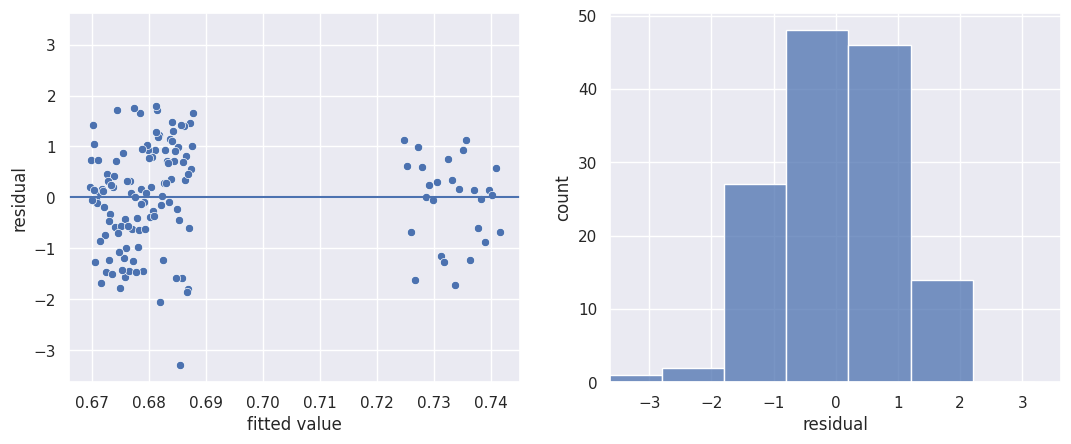

In [27]:
result.plot_residuals()